# Prediksi Emosi Spotify - Logistic Regression (Versi Sederhana)
Model: Logistic Regression pada 12 fitur dasar (seperti Random Forest)
Tidak ada fitur interaksi, tidak ada one-hot encoding

## 1. Import Library

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

## 2. Load Dataset

In [10]:
df = pd.read_csv('Spotify Song Attributes.csv')
df = df.drop(columns=['id', 'Unnamed: 0', 'song_title', 'artist'], errors='ignore')
df = df.dropna(subset=['valence'])

# Buat target DAN HAPUS VALENCE
df['target'] = (df['valence'] > 0.5).astype(int)
df = df.drop(columns=['valence'])  # 🔥 HAPUS VALENCE

print(f"✅ Dataset dimuat. Jumlah baris: {len(df)}")

✅ Dataset dimuat. Jumlah baris: 2017


## 3. Siapkan Fitur (HANYA 12 FITUR DASAR)

In [11]:
# Gunakan hanya fitur dasar — sama seperti Random Forest
base_features = [
    'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'key', 'liveness', 'loudness',
    'mode', 'speechiness', 'tempo', 'time_signature'
]

X = df[base_features]  # ← Hanya 12 fitur
y = df['target']

print(f"✅ Fitur yang digunakan: {len(base_features)} fitur dasar")

✅ Fitur yang digunakan: 12 fitur dasar


## 4. Split Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 5. Latih Model (Tanpa Scaling, Karena RF Juga Tidak Pakai)

In [13]:
# Coba beberapa nilai C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(
    LogisticRegression(max_iter=2000, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

print(f"✅ Model terlatih! Best C: {grid.best_params_['C']}")

✅ Model terlatih! Best C: 100


## 6. Evaluasi

In [14]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_proba)

print(f"\n🎯 Akurasi: {acc:.4f}")
print(f"🎯 AUC: {auc_score:.4f}")
print("\n📋 Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Netral', 'Positif']))


🎯 Akurasi: 0.6609
🎯 AUC: 0.7316

📋 Laporan Klasifikasi:
              precision    recall  f1-score   support

      Netral       0.68      0.64      0.66       207
     Positif       0.64      0.69      0.66       197

    accuracy                           0.66       404
   macro avg       0.66      0.66      0.66       404
weighted avg       0.66      0.66      0.66       404



## 7. Visualisasi

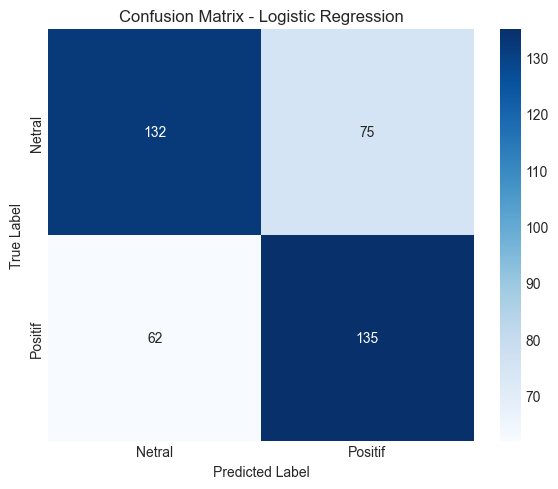

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Netral', 'Positif'],
            yticklabels=['Netral', 'Positif'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## 8. Simpan Model dan Fitur

In [16]:
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('lr_feature_columns.pkl', 'wb') as f:
    pickle.dump(base_features, f)  # ← Simpan 12 fitur dasar

with open('lr_accuracy.txt', 'w') as f:
    f.write(f"Akurasi: {acc:.4f}\nAUC: {auc_score:.4f}\nBest C: {grid.best_params_['C']}")

print("\n✅ Model Logistic Regression disimpan:")
print("  - logistic_model.pkl")
print("  - lr_feature_columns.pkl")


✅ Model Logistic Regression disimpan:
  - logistic_model.pkl
  - lr_feature_columns.pkl
